In [1]:
import maialib as ml

First, import the desired music score:

In [2]:
myScore = ml.Score("../test/xml_examples/unit_test/test_multiple_instruments4.musicxml")

Now you can parse the maialib `Score` object to a `Pandas DataFrame` using:

In [3]:
df = myScore.toDataFrame()
df

,Part,Measure,Note
0,<Part Soprano>,<Measure 0>,<Note G5>
1,<Part Soprano>,<Measure 0>,<Note C5>
2,<Part Soprano>,<Measure 0>,<Note B4>
3,<Part Soprano>,<Measure 1>,<Note A4>
4,<Part Soprano>,<Measure 1>,<Note G4>
...,...,...,...
76,<Part Piano>,<Measure 4>,<Note C5>
77,<Part Piano>,<Measure 4>,<Note rest>
78,<Part Piano>,<Measure 4>,<Note G3>
79,<Part Piano>,<Measure 4>,<Note G2>


## 2 - Filtering the DataFrame

Unlike a usual DataFrame object, the output DataFrame of the `Score::toDataFrame()` method is not composed of primary types (like `numbers` and `strings`), but of `maialib` objects.
They are: `Part Object`, `Measure Object` and `Note Object`.

For this reason, the filter methods of this DataFrame type need to be done via a `lambda` function.

### 2.1 - Filtering from a object property

This example below shows how to filter only the notes inside the `Piano` part

In [4]:
df[df["Part"].map(lambda part: part.getName() == "Piano")]

,Part,Measure,Note
30,<Part Piano>,<Measure 0>,<Note C5>
31,<Part Piano>,<Measure 0>,<Note rest>
32,<Part Piano>,<Measure 0>,<Note E4>
33,<Part Piano>,<Measure 0>,<Note G3>
34,<Part Piano>,<Measure 0>,<Note rest>
35,<Part Piano>,<Measure 0>,<Note C3>
36,<Part Piano>,<Measure 1>,<Note rest>
37,<Part Piano>,<Measure 1>,<Note rest>
38,<Part Piano>,<Measure 1>,<Note D5>
39,<Part Piano>,<Measure 1>,<Note C5>


### 2.2 - Filtering from a object property (2 possibilities)

This example below shows how to filter the notes inside the `Piano` and `Soprano` parts

In [5]:
df[df["Part"].map(lambda part: part.getName() in ["Piano", "Soprano"])]

,Part,Measure,Note
0,<Part Soprano>,<Measure 0>,<Note G5>
1,<Part Soprano>,<Measure 0>,<Note C5>
2,<Part Soprano>,<Measure 0>,<Note B4>
3,<Part Soprano>,<Measure 1>,<Note A4>
4,<Part Soprano>,<Measure 1>,<Note G4>
...,...,...,...
76,<Part Piano>,<Measure 4>,<Note C5>
77,<Part Piano>,<Measure 4>,<Note rest>
78,<Part Piano>,<Measure 4>,<Note G3>
79,<Part Piano>,<Measure 4>,<Note G2>


### 2.3 - Filtering with multiple conditions

This example below shows how to filter the notes inside the `Soprano` with `G5` pitch

In [6]:
df[
    df["Note"].map(lambda note: note.getPitch() == "G5") &
    df["Part"].map(lambda part: part.getName() == "Soprano")
]

,Part,Measure,Note
0,<Part Soprano>,<Measure 0>,<Note G5>


## 3 - Adding new columns
You can add a new column in a similar way that you saw before

In [7]:
df["MIDI"] = df["Note"].map(lambda note: note.getMIDINumber())
df

,Part,Measure,Note,MIDI
0,<Part Soprano>,<Measure 0>,<Note G5>,79
1,<Part Soprano>,<Measure 0>,<Note C5>,72
2,<Part Soprano>,<Measure 0>,<Note B4>,71
3,<Part Soprano>,<Measure 1>,<Note A4>,69
4,<Part Soprano>,<Measure 1>,<Note G4>,67
...,...,...,...,...
76,<Part Piano>,<Measure 4>,<Note C5>,72
77,<Part Piano>,<Measure 4>,<Note rest>,-1
78,<Part Piano>,<Measure 4>,<Note G3>,55
79,<Part Piano>,<Measure 4>,<Note G2>,43


## 4 - Use Pandas built-in math functions
You can see all Pandas math operations in the Pandas official website:
https://pandas.pydata.org/docs/reference/frame.html

Just to examplify, you can apply some math functions like below:

### 4.1 Compute mean value

In [8]:
myResult = df["Note"].map(lambda note: note.getMIDINumber()).mean()
print(f"The mean of all MIDI Numbers are: {myResult}")

The mean of all MIDI Numbers are: 54.77777777777778


### 4.2 Compute Kurtosis value

In [9]:
myResult = df["Note"].map(lambda note: note.getMIDINumber()).kurtosis()
print(f"The kurtosis of all MIDI Numbers are: {myResult}")

The kurtosis of all MIDI Numbers are: 1.663910155162923


### 4.3 Plot Data

<AxesSubplot:>

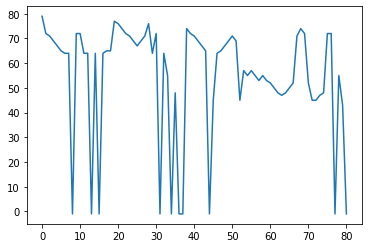

In [10]:
df["Note"].map(lambda note: note.getMIDINumber()).plot()